In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [33]:
# Step 1: Load and Prepare the Data
def load_data(file_path):
    """
    Load the Advertising dataset and separate features and target.
    """
    data = pd.read_csv(file_path)
    X = data[['TV', 'Radio', 'Newspaper']].values
    y = data['Sales'].values
    return X, y

In [34]:
data = pd.read_csv("Advertising.csv")
X = data[['TV', 'Radio', 'Newspaper']].values
y = data['Sales'].values

print(X[:5],y[:5])

[[230.1  37.8  69.2]
 [ 44.5  39.3  45.1]
 [ 17.2  45.9  69.3]
 [151.5  41.3  58.5]
 [180.8  10.8  58.4]] [22.1 10.4  9.3 18.5 12.9]


In [35]:
#normalize_features
X = (X - np.mean(X, axis = 0)) / np.std(X, axis = 0)
print(X[:5])

[[ 0.96985227  0.98152247  1.77894547]
 [-1.19737623  1.08280781  0.66957876]
 [-1.51615499  1.52846331  1.78354865]
 [ 0.05204968  1.21785493  1.28640506]
 [ 0.3941822  -0.84161366  1.28180188]]


In [36]:
#Adding extra column of all one's to X
X = np.c_[np.ones(X.shape[0]), X]
print(X[:5])

[[ 1.          0.96985227  0.98152247  1.77894547]
 [ 1.         -1.19737623  1.08280781  0.66957876]
 [ 1.         -1.51615499  1.52846331  1.78354865]
 [ 1.          0.05204968  1.21785493  1.28640506]
 [ 1.          0.3941822  -0.84161366  1.28180188]]


In [37]:
#Splitting Dataset 85% train - rest test
def train_test_split(X, y, train_size = 0.85):
    n_train = int(len(X) * train_size)
    return X[:n_train], y[:n_train], X[n_train:], y[n_train:]


X_train, y_train, X_test, y_test = train_test_split(X, y)
print(X_train[:5], y_train[:5])

[[ 1.          0.96985227  0.98152247  1.77894547]
 [ 1.         -1.19737623  1.08280781  0.66957876]
 [ 1.         -1.51615499  1.52846331  1.78354865]
 [ 1.          0.05204968  1.21785493  1.28640506]
 [ 1.          0.3941822  -0.84161366  1.28180188]] [22.1 10.4  9.3 18.5 12.9]


# ITEM NUMBER 5

In [38]:
#1. Initialize weights (alpha)
def initialized_weights(n_features = 4, seed = None):
    if seed is not None:
        np.random.seed(seed)

    init_w = np.random.uniform(0, 1, n_features)

    return init_w



In [39]:
#2. Predict
# predict = np.dot(X, init_w)
# print(predict[:5])

def predict(X, theta):
    return np.dot(X, theta)

In [40]:
#3. Compute Cost
# m = len(y)
# cost = 1 / (2 * m) * np.sum((predict - y) ** 2)
# print(cost)

def compute_cost(X, y, theta):
    m = len(y)
    predictions = predict(X,theta)
    return (1 / (2 * m)) * np.sum((predictions - y) ** 2)

In [41]:
#4. Compute Gradient
# m = len(y)
# gradient = (1 / m) * np.dot (X.T, (predict - y))
# print(f"Matrix size:{gradient.shape}")
# print(gradient)

def compute_gradient(X, y, theta):
    m = len(y)
    predictions = predict(X, theta)
    return (1 / m) * np.dot(X.T, (predictions - y))

In [42]:
#5. Update Weights
alpha = 0.01
# Updated_weights = init_w - alpha * gradient
# print(Updated_weights)

def update_weights(theta, alpha, gradient):
    return theta - alpha * gradient

In [43]:
#6. Loop functions 1 - 5, Gradient_Descent
iterations = 50000
def gradient_descent(X, y, theta, alpha, iterations):
    cost_history = []
    for _ in range(iterations):
        gradient = compute_gradient(X, y, theta)
        theta = update_weights(theta, gradient, alpha)
        cost_history.append(compute_cost(X, y, theta))
    return theta, cost_history

#init_w = initialized_weights(n_features = 4)
init_w = np.array([0.0, 0.0, 0.0, 0.0]) #to set weights to 0000
theta = init_w

#Remove Seed for randomness


theta, cost_history = gradient_descent(X_train, y_train, theta, alpha, iterations)
print("Optimal weights:", theta)

Optimal weights: [13.99978801  4.01256264  2.71475287 -0.05049148]


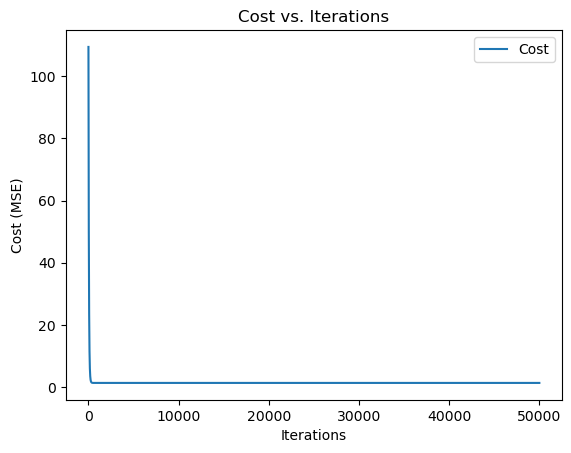

In [44]:
#7. Plot Costs
def plot_costs(cost_history):
    plt.plot(cost_history, label='Cost')
    plt.xlabel('Iterations')
    plt.ylabel('Cost (MSE)')
    plt.title('Cost vs. Iterations')
    plt.legend()
    plt.show()

plot_costs(cost_history)

# Questions

In [45]:
#1. Optimal weights and linear model
print("Optimal weights:", theta)

Optimal weights: [13.99978801  4.01256264  2.71475287 -0.05049148]


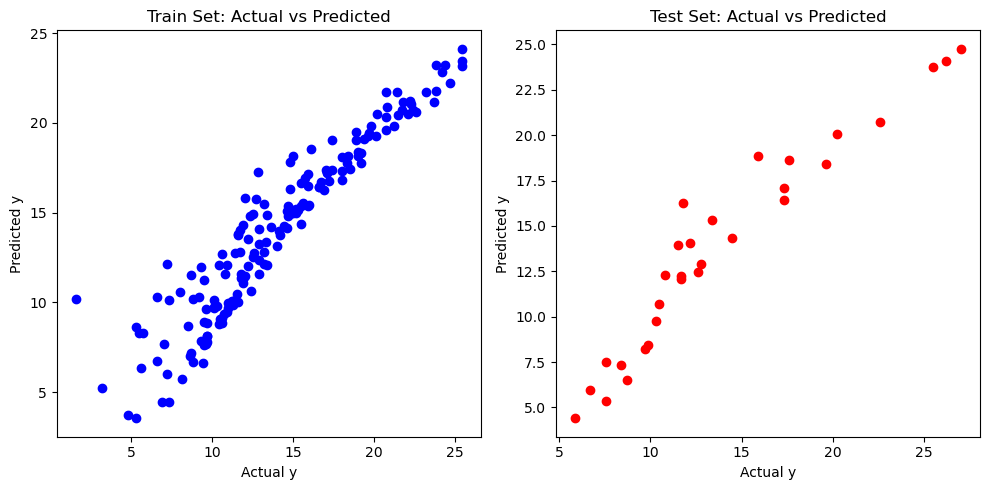

R² score for Train Set: 0.8919516182718155
R² score for Test Set: 0.9172988466463525


In [46]:
#2. Scatterplot and R2
train_predictions = predict(X_train, theta)
test_predictions = predict(X_test, theta)

plt.figure(figsize=(10, 5))

# Train Set
plt.subplot(1, 2, 1)
plt.scatter(y_train, train_predictions, color='blue')
plt.title("Train Set: Actual vs Predicted")
plt.xlabel("Actual y")
plt.ylabel("Predicted y")

# Test Set
plt.subplot(1, 2, 2)
plt.scatter(y_test, test_predictions, color='red')
plt.title("Test Set: Actual vs Predicted")
plt.xlabel("Actual y")
plt.ylabel("Predicted y")

plt.tight_layout()
plt.show()

r2_train = r2_score(y_train, train_predictions)
r2_test = r2_score(y_test, test_predictions)

print("R² score for Train Set:", r2_train)
print("R² score for Test Set:", r2_test)


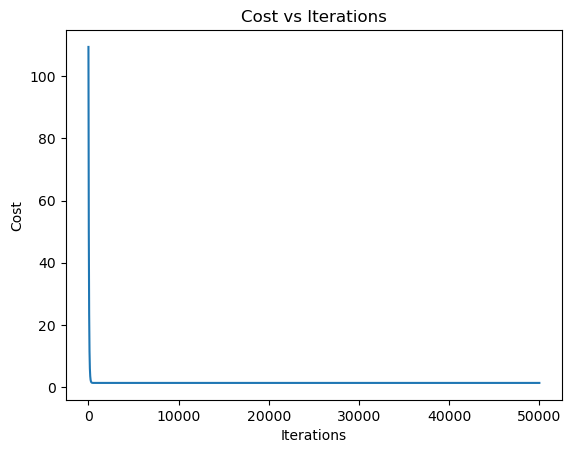

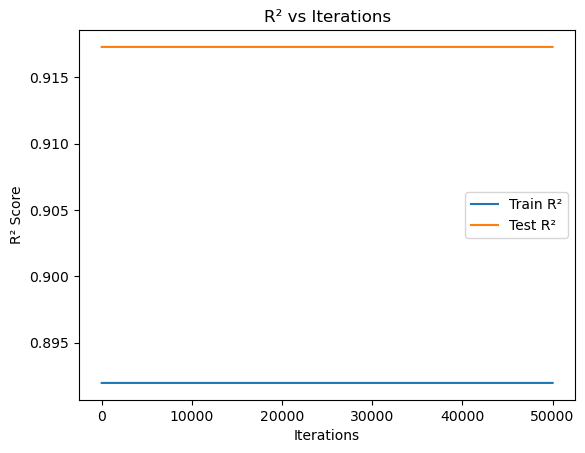

In [28]:
#3. Error, R2 and Cost as the Iterations Increase

plt.plot(range(len(cost_history)), cost_history)
plt.title("Cost vs Iterations")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()

r2_train_history = []
r2_test_history = []

# Run gradient descent and track R²
for i in range(1, iterations + 1):
    gradient = compute_gradient(X_train, y_train, theta)
    theta = update_weights(theta, gradient, alpha)
    
    # Predictions
    train_pred = predict(X_train, theta)
    test_pred = predict(X_test, theta)
    
    # Calculate R²
    r2_train_history.append(r2_score(y_train, train_pred))
    r2_test_history.append(r2_score(y_test, test_pred))

# Plot R² vs Iterations
import matplotlib.pyplot as plt

plt.plot(range(1, iterations + 1), r2_train_history, label="Train R²")
plt.plot(range(1, iterations + 1), r2_test_history, label="Test R²")
plt.xlabel("Iterations")
plt.ylabel("R² Score")
plt.legend()
plt.title("R² vs Iterations")
plt.show()

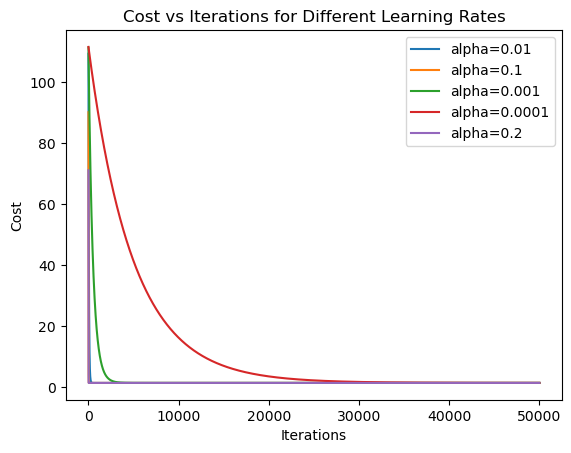

In [47]:
#4. Varied Learning Rate

learning_rates = [0.01, 0.1, 0.001, 0.0001, 0.2]
for alpha in learning_rates:
    theta = init_w.copy()
    _, cost_history = gradient_descent(X_train, y_train, theta, alpha, iterations)
    plt.plot(range(len(cost_history)), cost_history, label=f"alpha={alpha}")
plt.title("Cost vs Iterations for Different Learning Rates")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.legend()
plt.show()

In [49]:
#5 Ordinary Least Squares Function
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train[:, 1:], y_train)  # Remove bias column
print("OLS Weights:", [lr.intercept_, *lr.coef_])

OLS Weights: [13.999788008454164, 4.012562637013911, 2.714752872238676, -0.05049147740273453]
